In [30]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

In [31]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
df.shape

(150, 4)

In [35]:
# df['target'] = iris.target
# df.head()

# Translate slice objects to concatenate along second axis
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# make a categorical types
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [36]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
50,7.0,3.2,4.7,1.4,1.0,versicolor
51,6.4,3.2,4.5,1.5,1.0,versicolor
52,6.9,3.1,4.9,1.5,1.0,versicolor
53,5.5,2.3,4.0,1.3,1.0,versicolor
54,6.5,2.8,4.6,1.5,1.0,versicolor


In [37]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
100,6.3,3.3,6.0,2.5,2.0,virginica
101,5.8,2.7,5.1,1.9,2.0,virginica
102,7.1,3.0,5.9,2.1,2.0,virginica
103,6.3,2.9,5.6,1.8,2.0,virginica
104,6.5,3.0,5.8,2.2,2.0,virginica


In [38]:
# df["species"] = df.target.apply(lambda x:iris.target_names[x])
# df.head()

df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [39]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
45,4.8,3.0,1.4,0.3,0.0,setosa
46,5.1,3.8,1.6,0.2,0.0,setosa
47,4.6,3.2,1.4,0.2,0.0,setosa
48,5.3,3.7,1.5,0.2,0.0,setosa
49,5.0,3.3,1.4,0.2,0.0,setosa
50,7.0,3.2,4.7,1.4,1.0,versicolor
51,6.4,3.2,4.5,1.5,1.0,versicolor
52,6.9,3.1,4.9,1.5,1.0,versicolor
53,5.5,2.3,4.0,1.3,1.0,versicolor
54,6.5,2.8,4.6,1.5,1.0,versicolor


In [40]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[:100]

In [41]:
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline

In [42]:
# Plot pairwise relationships in a dataset.
import seaborn as sns

sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

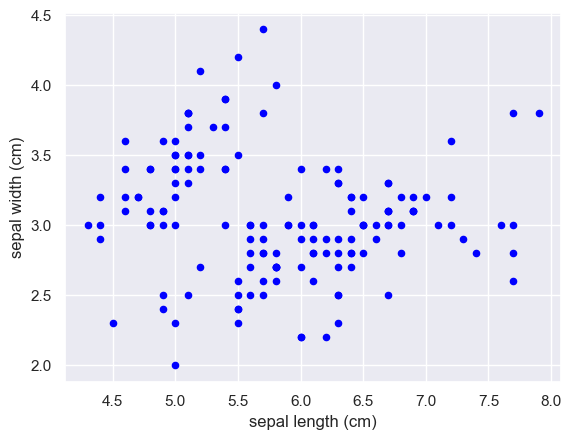

In [43]:
# plt.xlabel('Sepal Length')
# plt.ylabel('Sepal Width')
# plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = "green",marker='+') #setosa
# plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = "blue",marker='.') #versicolor

df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)",color="blue")


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

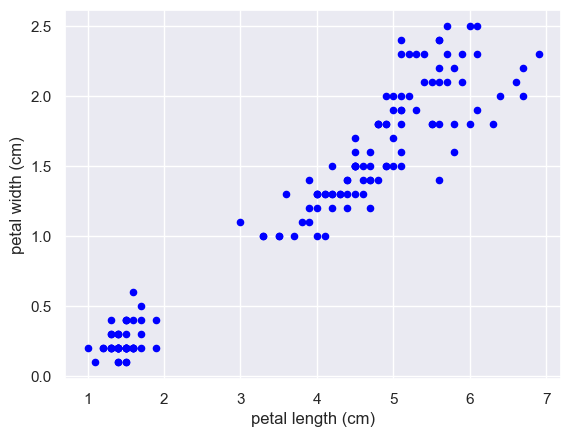

In [44]:
# plt.xlabel('Petal Length')
# plt.ylabel('Petal Width')
# plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = "green",marker='+') #setosa
# plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = "blue",marker='.') #versicolor

df.plot(kind="scatter", x="petal length (cm)", y="petal width (cm)",color="blue")


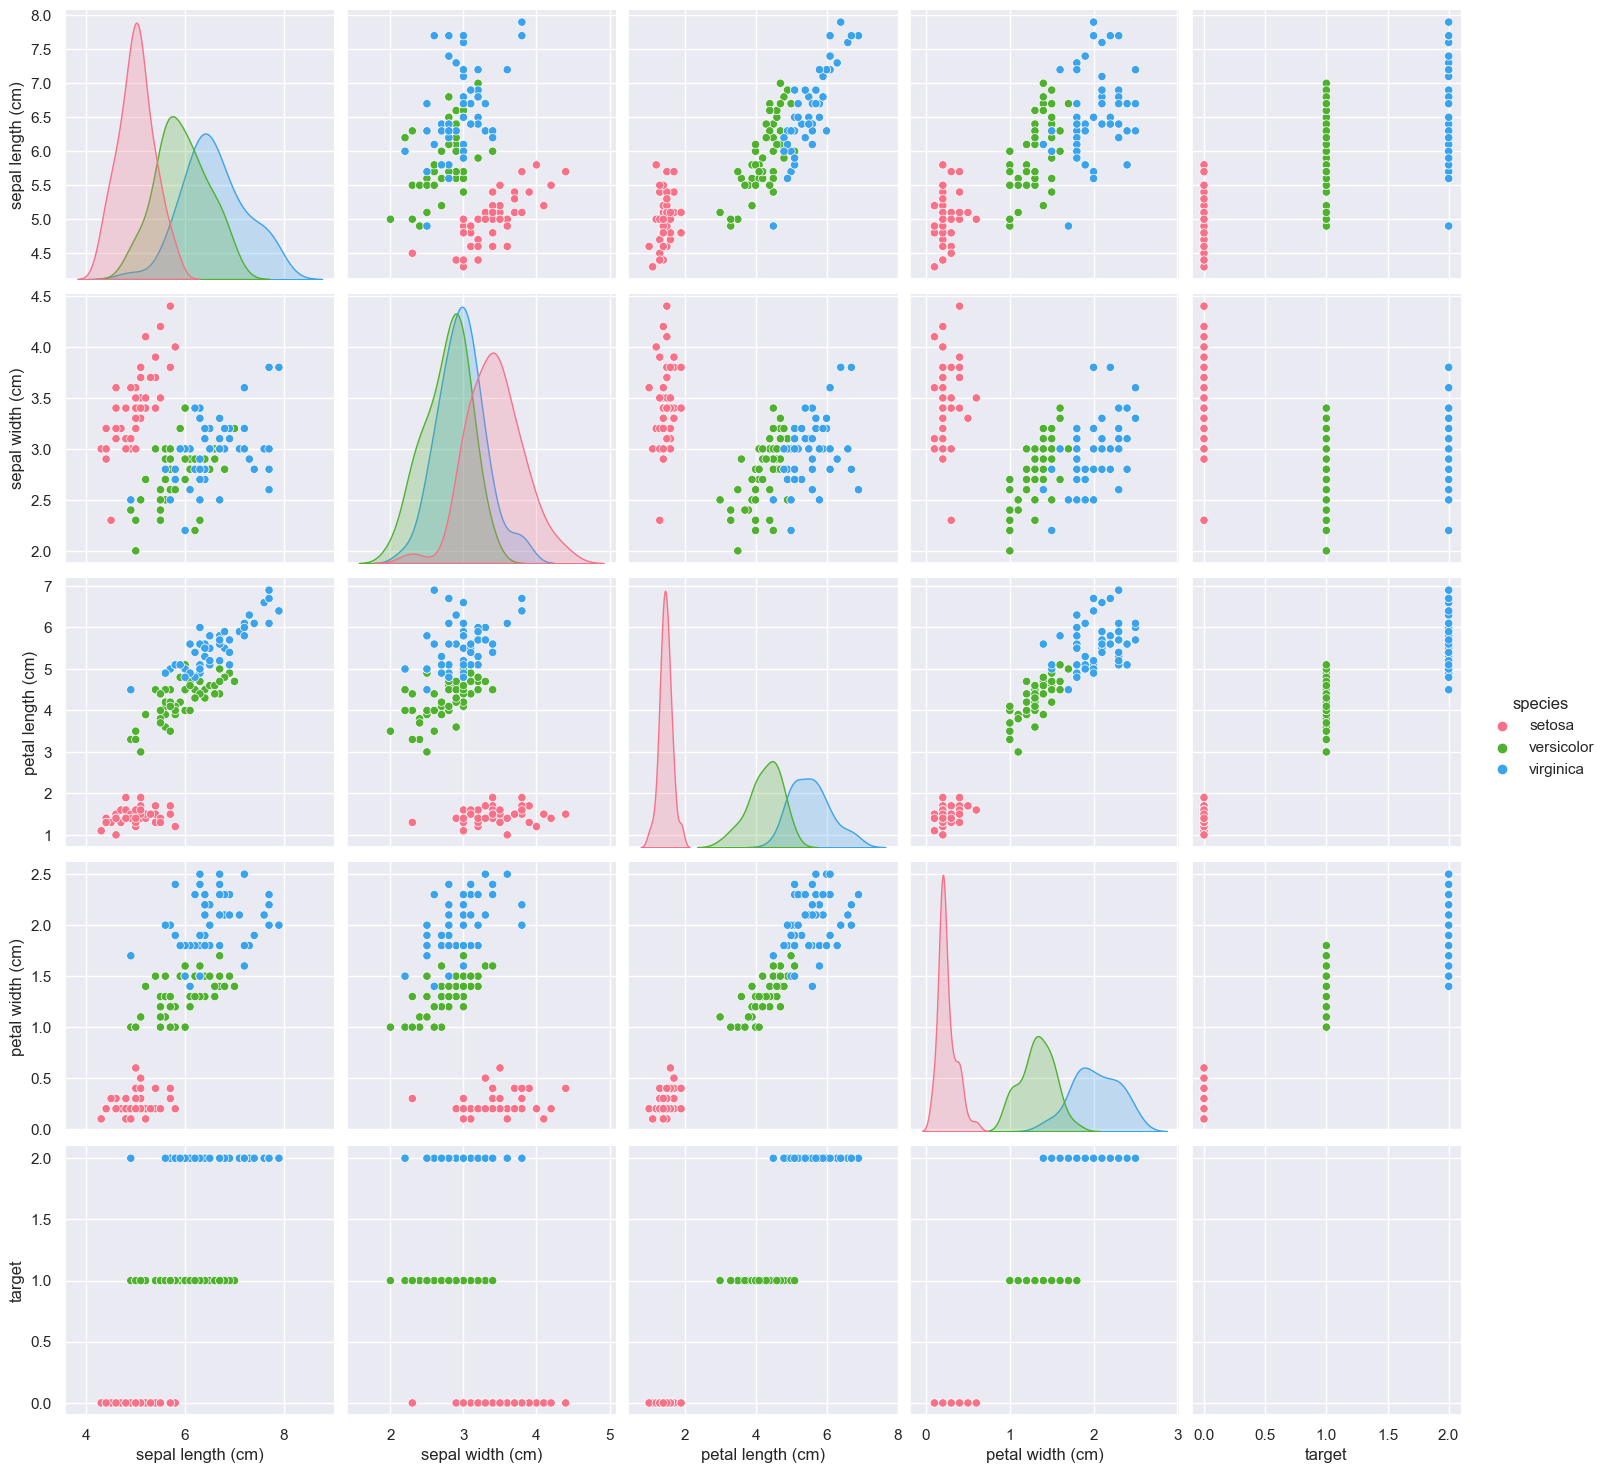

In [45]:
# sns.pairplot(data,hue=(name of variable),palette=())
sns.pairplot(df, hue="species", palette="husl", size=3)

## Train test split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Create X (features) and y (response)
X = iris.data
y = iris.target

In [48]:
# Split arrays or matrices into random train and test subsets.
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [49]:
# len(X_train)

In [50]:
# len(X_test)

In [51]:
# print(X_test)

## Create KNN (K Nearest Neighbour Classifier)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# knn = KNeighborsClassifier(n_neighbors = 11)
# knn.fit(X_train,y_train)

def fitAndPredict(X_train, y_train, X_test, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    return knn.predict(X_test)


In [53]:
# knn.score(X_test,y_test)

In [54]:
%%time
from sklearn.metrics import confusion_matrix
import random

# y_pred = knn.predict(X_test)
# print(metrics.accuracy_score(y_test, y_pred))

# cm = confusion_matrix(y_test,y_pred)
# cm
test_scores = []
k_range = range(1, 12,2)

for i in range(1,10):
    test_ratio = i / 10 
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_ratio,random_state = 5)
    for k in k_range:
        data = {}
        data['test_ratio'] = test_ratio
        data['neighbor'] = k
        data['y_test']=y_test
        y_pred = fitAndPredict(X_train, y_train, X_test, k)
        data['accuracy_score'] = metrics.accuracy_score(y_test, y_pred)
        data['y_pred'] = y_pred
        test_scores.append(data);
for test in test_scores:
    print("Test_Ratio",test['test_ratio'],"K = ",test['neighbor'], "accuracy_score = ",test['accuracy_score'])

Test_Ratio 0.1 K =  1 accuracy_score =  0.8666666666666667
Test_Ratio 0.1 K =  3 accuracy_score =  0.8666666666666667
Test_Ratio 0.1 K =  5 accuracy_score =  0.9333333333333333
Test_Ratio 0.1 K =  7 accuracy_score =  0.9333333333333333
Test_Ratio 0.1 K =  9 accuracy_score =  1.0
Test_Ratio 0.1 K =  11 accuracy_score =  0.9333333333333333
Test_Ratio 0.2 K =  1 accuracy_score =  0.9
Test_Ratio 0.2 K =  3 accuracy_score =  0.9333333333333333
Test_Ratio 0.2 K =  5 accuracy_score =  0.9333333333333333
Test_Ratio 0.2 K =  7 accuracy_score =  0.9666666666666667
Test_Ratio 0.2 K =  9 accuracy_score =  0.9666666666666667
Test_Ratio 0.2 K =  11 accuracy_score =  0.9666666666666667
Test_Ratio 0.3 K =  1 accuracy_score =  0.9333333333333333
Test_Ratio 0.3 K =  3 accuracy_score =  0.9555555555555556
Test_Ratio 0.3 K =  5 accuracy_score =  0.9555555555555556
Test_Ratio 0.3 K =  7 accuracy_score =  0.9777777777777777
Test_Ratio 0.3 K =  9 accuracy_score =  0.9777777777777777
Test_Ratio 0.3 K =  11 ac

In [55]:
%%time
from sklearn.metrics import classification_report

for test in test_scores:
    print("K = ",test['neighbor'],"Test_Ratio ", test['test_ratio'])
    print(classification_report(test['y_test'],test['y_pred']))


K =  1 Test_Ratio  0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.80      0.80      0.80         5
           2       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.88      0.88      0.88        15
weighted avg       0.87      0.87      0.87        15

K =  3 Test_Ratio  0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.80      0.80      0.80         5
           2       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.88      0.88      0.88        15
weighted avg       0.87      0.87      0.87        15

K =  5 Test_Ratio  0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89         5
      

In [56]:
## Finding max accuracy_scores for given K value in various test_ratio reference 

scores = []
count = 1
base = 0
top = 6
for test in test_scores:
    scores.append(test['accuracy_score'])
    
for i in range(1,10):
    max_val = max(scores[base:top])
    max_index = scores.index(max_val)
    print("test_ratio ",test_scores[max_index]['test_ratio'],"Neighbor ",test_scores[max_index]['neighbor'],"max_accuracy_score",test_scores[max_index]['accuracy_score'])
    base += 6
    top += 6
    



test_ratio  0.1 Neighbor  9 max_accuracy_score 1.0
test_ratio  0.2 Neighbor  7 max_accuracy_score 0.9666666666666667
test_ratio  0.3 Neighbor  7 max_accuracy_score 0.9777777777777777
test_ratio  0.1 Neighbor  9 max_accuracy_score 1.0
test_ratio  0.5 Neighbor  3 max_accuracy_score 0.9733333333333334
test_ratio  0.3 Neighbor  7 max_accuracy_score 0.9777777777777777
test_ratio  0.7 Neighbor  3 max_accuracy_score 0.9428571428571428
test_ratio  0.8 Neighbor  1 max_accuracy_score 0.975
test_ratio  0.9 Neighbor  1 max_accuracy_score 0.9629629629629629
